In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

In [3]:
#print(X_train, Y_train, X_test, Y_test)

In [4]:
print(type(Y_train))

<class 'numpy.ndarray'>


In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


5


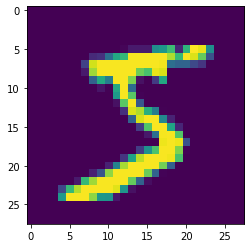

In [6]:
plt.imshow(X_train[0])
print(Y_train[0])


In [7]:
from collections import defaultdict

appearances = defaultdict(int)

for curr in Y_train:
    appearances[curr] += 1
   

In [8]:
print(appearances)

defaultdict(<class 'int'>, {5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851})


In [9]:
X_train=X_train.reshape(X_train.shape[0],1,28,28)

In [10]:
X_test=X_test.reshape(X_test.shape[0],1,28,28)

In [11]:
print(X_train.shape)

(60000, 1, 28, 28)


In [12]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [13]:
print(X_train)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 ...


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. 

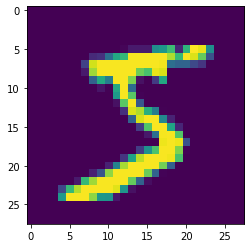

In [14]:
plt.imshow(X_train[0,0])

In [15]:
print(Y_train.shape)
Y_train=np_utils.to_categorical(Y_train,10)
print(Y_train.shape)

(60000,)
(60000, 10)


In [16]:
Y_test=np_utils.to_categorical(Y_test,10)

In [17]:
print(Y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
model= Sequential()
model.add(Convolution2D(32,(3,3), activation='relu', input_shape = (1,28,28), data_format='channels_first' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2494 - acc: 0.9273
Epoch 2/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1376 - acc: 0.9585
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1097 - acc: 0.9665
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0928 - acc: 0.9721
Epoch 5/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0811 - acc: 0.9750
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0707 - acc: 0.9780
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0645 - acc: 0.9796
Epoch 8/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0587 - acc: 0.9815
Epoch 9/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0571 - acc: 0.9810
Epoch 10/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0510 - acc: 0.9835

In [21]:
pr=model.evaluate(X_test,Y_test,verbose=1)

10000/10000 [==============================] - 3s 292us/step


In [22]:
print(pr)

[0.03933750649817139, 0.9873]


In [23]:
from scipy import stats

In [24]:
stats.describe(Y_train)

DescribeResult(nobs=60000, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)), mean=array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751666, 0.09915   ],
      dtype=float32), variance=array([0.08899095, 0.09977958, 0.08939134, 0.09173309, 0.08786944,
       0.08217361, 0.08893471, 0.09350377, 0.08796874, 0.08929227],
      dtype=float32), skewness=array([2.6894794, 2.4525526, 2.6820025, 2.6285813, 2.715727 , 2.858767 ,
       2.690582 , 2.5869107, 2.714187 , 2.6835222], dtype=float32), kurtosis=array([5.232419 , 4.0237994, 5.186242 , 4.8963795, 5.3774796, 6.169155 ,
       5.2388954, 4.689675 , 5.365587 , 5.1973677], dtype=float32))